In [1]:
import os

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import glob

from pathlib import Path

import scipy.stats as stats

from scipy import stats

import ruptures

In [2]:
# plot of all 8 future scenarios based on the newly processed data
# gets monthly means of T2 for all scenarios
def monthly_means(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_45cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp3', f'{input_BA}_*.csv'))
    list_45cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    list_45hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp3', f'{input_BA}_*.csv'))
    list_45hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    list_85cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp3', f'{input_BA}_*.csv'))
    list_85cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    list_85hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp3', f'{input_BA}_*.csv'))
    list_85hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_45cooler_3_means = []
    list_45cooler_5_means = []
    list_45hotter_3_means = []
    list_45hotter_5_means = []
    list_85cooler_3_means = []
    list_85cooler_5_means = []
    list_85hotter_3_means = []
    list_85hotter_5_means = []
    
    for file_index in range(len(list_45cooler_3_files)):
        
        # read in yearly data as df
        year_45cooler_3_df = pd.read_csv(list_45cooler_3_files[file_index], index_col = None, header = 0)
        year_45cooler_5_df = pd.read_csv(list_45cooler_5_files[file_index], index_col = None, header = 0)
        year_45hotter_3_df = pd.read_csv(list_45hotter_3_files[file_index], index_col = None, header = 0)
        year_45hotter_5_df = pd.read_csv(list_45hotter_5_files[file_index], index_col = None, header = 0)
        year_85cooler_3_df = pd.read_csv(list_85cooler_3_files[file_index], index_col = None, header = 0)
        year_85cooler_5_df = pd.read_csv(list_85cooler_5_files[file_index], index_col = None, header = 0)
        year_85hotter_3_df = pd.read_csv(list_85hotter_3_files[file_index], index_col = None, header = 0)
        year_85hotter_5_df = pd.read_csv(list_85hotter_5_files[file_index], index_col = None, header = 0)
        
        # add months column, and T2 column for each scenario to the first year_45cooler_3_df
        year_45cooler_3_df['Month'] = pd.DatetimeIndex(year_45cooler_3_df['Time_UTC']).month
        
        year_45cooler_3_df['45cooler_5_T2'] = year_45cooler_5_df['T2']
        year_45cooler_3_df['45hotter_3_T2'] = year_45hotter_3_df['T2']
        year_45cooler_3_df['45hotter_5_T2'] = year_45hotter_5_df['T2']
        year_45cooler_3_df['85cooler_3_T2'] = year_85cooler_3_df['T2']
        year_45cooler_3_df['85cooler_5_T2'] = year_85cooler_5_df['T2']
        year_45cooler_3_df['85hotter_3_T2'] = year_85hotter_3_df['T2']
        year_45cooler_3_df['85hotter_5_T2'] = year_85hotter_5_df['T2']
        
        # create the monthly dfs for hot and cold
        hot_df1 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 1]
        hot_df2 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 2]
        hot_df3 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 3]
        hot_df4 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 4]
        hot_df5 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 5]
        hot_df6 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 6]
        hot_df7 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 7]
        hot_df8 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 8]
        hot_df9 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 9]
        hot_df10 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 10]
        hot_df11 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 11]
        hot_df12 = year_45cooler_3_df[year_45cooler_3_df['Month'] == 12]
        
        # create a list to iterate over the monthly dfs
        hot_monthly_list = [hot_df1, hot_df2, hot_df3, hot_df4, hot_df5, hot_df6, hot_df7, hot_df8, hot_df9, hot_df10, hot_df11, hot_df12]
        
        for month_df in hot_monthly_list:
            
            # add the mean of the monthly diff values to list
            list_45cooler_3_means.append(month_df['T2'].mean())
            list_45cooler_5_means.append(month_df['45cooler_5_T2'].mean())
            list_45hotter_3_means.append(month_df['45hotter_3_T2'].mean())
            list_45hotter_5_means.append(month_df['45hotter_5_T2'].mean())
            list_85cooler_3_means.append(month_df['85cooler_3_T2'].mean())
            list_85cooler_5_means.append(month_df['85cooler_5_T2'].mean())
            list_85hotter_3_means.append(month_df['85hotter_3_T2'].mean())
            list_85hotter_5_means.append(month_df['85hotter_5_T2'].mean())
            
    # create df from the list of top 5% difference means
    diff_means_df = pd.DataFrame(list_45cooler_3_means,
                                 columns = ['45Cooler_3'])
    diff_means_df['45Cooler_5'] = list_45cooler_5_means
    diff_means_df['45Hotter_3'] = list_45hotter_3_means
    diff_means_df['45Hotter_5'] = list_45hotter_5_means
    diff_means_df['85Cooler_3'] = list_85cooler_3_means
    diff_means_df['85Cooler_5'] = list_85cooler_5_means
    diff_means_df['85Hotter_3'] = list_85hotter_3_means
    diff_means_df['85Hotter_5'] = list_85hotter_5_means
    
    # create list of years to add to df
    years_list = [range(2020, 2100)]
    years_list_repeated = np.repeat(years_list, 12)
    diff_means_df['Year'] = years_list_repeated
    
    # create months index to add to df
    months_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    months_list_repeated = months_list * 80
    diff_means_df['Month'] = months_list_repeated
    
    months_index = pd.date_range(start = '2020-01', end = '2100-01', freq = 'M')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', 'Month', '45Cooler_3', '45Cooler_5', '45Hotter_3', '45Hotter_5',
                                   '85Cooler_3', '85Cooler_5', '85Hotter_3', '85Hotter_5']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [3]:
aec_monthly_means = monthly_means('AECI')
aec_monthly_means

,Index,Year,Month,45Cooler_3,45Cooler_5,45Hotter_3,45Hotter_5,85Cooler_3,85Cooler_5,85Hotter_3,85Hotter_5
0,2020-01-31,2020,1,274.642355,274.706891,273.854738,273.919596,274.419637,274.485734,274.227133,274.288681
1,2020-02-29,2020,2,271.705632,271.803721,271.415805,271.513922,271.795704,271.900201,271.667414,271.762198
2,2020-03-31,2020,3,278.322500,278.403965,278.669812,278.748548,278.332970,278.414153,278.489073,278.565202
3,2020-04-30,2020,4,286.429764,286.466347,286.899583,286.933681,286.691472,286.733528,286.717708,286.757472
4,2020-05-31,2020,5,292.932997,292.971680,293.192379,293.223333,293.137352,293.175323,293.349664,293.386223
...,...,...,...,...,...,...,...,...,...,...,...
955,2099-08-31,2099,8,302.299906,302.302581,303.425659,303.442204,305.493011,305.509503,308.230941,308.288683
956,2099-09-30,2099,9,301.292014,301.318056,301.882597,301.919972,304.695639,304.728625,307.160014,307.222347
957,2099-10-31,2099,10,288.002702,288.032554,288.744274,288.765860,291.293280,291.319341,294.503656,294.527258
958,2099-11-30,2099,11,279.806931,279.782528,280.342347,280.323208,281.743806,281.729819,284.554222,284.547653


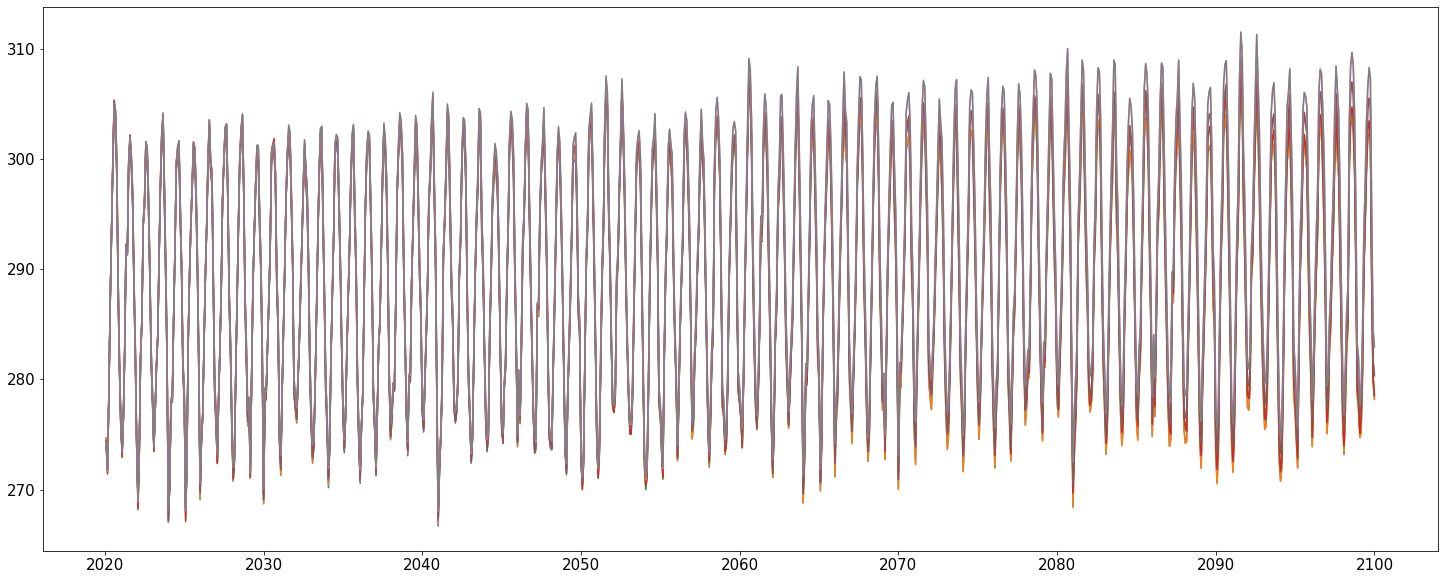

In [4]:
plt.figure(figsize=(25, 10))
plt.rcParams['font.size'] = 15
plt.plot(aec_monthly_means['Index'], aec_monthly_means['45Cooler_3'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['45Cooler_5'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['45Hotter_3'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['45Hotter_5'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['85Cooler_3'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['85Cooler_5'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['85Hotter_3'])
plt.plot(aec_monthly_means['Index'], aec_monthly_means['85Hotter_5'])

plt.show()

In [5]:
# plot of all 8 future scenarios based on the newly processed data
# gets monthly means of T2 for all scenarios
def yearly_means(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_45cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp3', f'{input_BA}_*.csv'))
    list_45cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    list_45hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp3', f'{input_BA}_*.csv'))
    list_45hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    list_85cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp3', f'{input_BA}_*.csv'))
    list_85cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    list_85hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp3', f'{input_BA}_*.csv'))
    list_85hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_45cooler_3_means = []
    list_45cooler_5_means = []
    list_45hotter_3_means = []
    list_45hotter_5_means = []
    list_85cooler_3_means = []
    list_85cooler_5_means = []
    list_85hotter_3_means = []
    list_85hotter_5_means = []
    
    for file_index in range(len(list_45cooler_3_files)):
        
        # read in yearly data as df
        year_45cooler_3_df = pd.read_csv(list_45cooler_3_files[file_index], index_col = None, header = 0)
        year_45cooler_5_df = pd.read_csv(list_45cooler_5_files[file_index], index_col = None, header = 0)
        year_45hotter_3_df = pd.read_csv(list_45hotter_3_files[file_index], index_col = None, header = 0)
        year_45hotter_5_df = pd.read_csv(list_45hotter_5_files[file_index], index_col = None, header = 0)
        year_85cooler_3_df = pd.read_csv(list_85cooler_3_files[file_index], index_col = None, header = 0)
        year_85cooler_5_df = pd.read_csv(list_85cooler_5_files[file_index], index_col = None, header = 0)
        year_85hotter_3_df = pd.read_csv(list_85hotter_3_files[file_index], index_col = None, header = 0)
        year_85hotter_5_df = pd.read_csv(list_85hotter_5_files[file_index], index_col = None, header = 0)
        
        
        year_45cooler_3_df['45cooler_5_T2'] = year_45cooler_5_df['T2']
        year_45cooler_3_df['45hotter_3_T2'] = year_45hotter_3_df['T2']
        year_45cooler_3_df['45hotter_5_T2'] = year_45hotter_5_df['T2']
        year_45cooler_3_df['85cooler_3_T2'] = year_85cooler_3_df['T2']
        year_45cooler_3_df['85cooler_5_T2'] = year_85cooler_5_df['T2']
        year_45cooler_3_df['85hotter_3_T2'] = year_85hotter_3_df['T2']
        year_45cooler_3_df['85hotter_5_T2'] = year_85hotter_5_df['T2']
        
        list_45cooler_3_means.append(year_45cooler_3_df['T2'].mean())
        list_45cooler_5_means.append(year_45cooler_3_df['45cooler_5_T2'].mean())
        list_45hotter_3_means.append(year_45cooler_3_df['45hotter_3_T2'].mean())
        list_45hotter_5_means.append(year_45cooler_3_df['45hotter_5_T2'].mean())
        list_85cooler_3_means.append(year_45cooler_3_df['85cooler_3_T2'].mean())
        list_85cooler_5_means.append(year_45cooler_3_df['85cooler_5_T2'].mean())
        list_85hotter_3_means.append(year_45cooler_3_df['85hotter_3_T2'].mean())
        list_85hotter_5_means.append(year_45cooler_3_df['85hotter_5_T2'].mean())
        
    # convert to F
    for temp_index in range(len(list_45cooler_3_means)):
        list_45cooler_3_means[temp_index] = 1.8 * (list_45cooler_3_means[temp_index] - 273) + 32
        list_45cooler_5_means[temp_index] = 1.8 * (list_45cooler_5_means[temp_index] - 273) + 32
        list_45hotter_3_means[temp_index] = 1.8 * (list_45hotter_3_means[temp_index] - 273) + 32
        list_45hotter_5_means[temp_index] = 1.8 * (list_45hotter_5_means[temp_index] - 273) + 32
        list_85cooler_3_means[temp_index] = 1.8 * (list_85cooler_3_means[temp_index] - 273) + 32
        list_85cooler_5_means[temp_index] = 1.8 * (list_85cooler_5_means[temp_index] - 273) + 32
        list_85hotter_3_means[temp_index] = 1.8 * (list_85hotter_3_means[temp_index] - 273) + 32
        list_85hotter_5_means[temp_index] = 1.8 * (list_85hotter_5_means[temp_index] - 273) + 32
        
    
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_45cooler_3_means,columns = ['45Cooler_3'])
    diff_means_df['45Cooler_5'] = list_45cooler_5_means
    diff_means_df['45Hotter_3'] = list_45hotter_3_means
    diff_means_df['45Hotter_5'] = list_45hotter_5_means
    diff_means_df['85Cooler_3'] = list_85cooler_3_means
    diff_means_df['85Cooler_5'] = list_85cooler_5_means
    diff_means_df['85Hotter_3'] = list_85hotter_3_means
    diff_means_df['85Hotter_5'] = list_85hotter_5_means
    
    # create list of years to add to df
    years_list = list(range(2020, 2100))
    diff_means_df['Year'] = years_list
    
    months_index = pd.date_range(start = '2020', end = '2100', freq = 'Y')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', '45Cooler_3', '45Cooler_5', '45Hotter_3', '45Hotter_5',
                                   '85Cooler_3', '85Cooler_5', '85Hotter_3', '85Hotter_5']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

In [6]:
# plot of all 8 future scenarios based on the newly processed data
# gets monthly max temps of T2 for all scenarios
def max_yearly_t2(input_BA): # do input_BA as string e.g. 'AEC'
    
    # create list of files to unpack for hot and cold scenario
    list_45cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp3', f'{input_BA}_*.csv'))
    list_45cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp5', f'{input_BA}_*.csv'))
    list_45hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp3', f'{input_BA}_*.csv'))
    list_45hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp45hotter_ssp5', f'{input_BA}_*.csv'))
    list_85cooler_3_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp3', f'{input_BA}_*.csv'))
    list_85cooler_5_files = glob.glob(os.path.join(r'C:\projects\rcp85cooler_ssp5', f'{input_BA}_*.csv'))
    list_85hotter_3_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp3', f'{input_BA}_*.csv'))
    list_85hotter_5_files = glob.glob(os.path.join(r'C:\projects\rcp85hotter_ssp5', f'{input_BA}_*.csv'))
    
    # get monthly chunks of data
    list_45cooler_3_maxes = []
    list_45cooler_5_maxes = []
    list_45hotter_3_maxes = []
    list_45hotter_5_maxes = []
    list_85cooler_3_maxes = []
    list_85cooler_5_maxes = []
    list_85hotter_3_maxes = []
    list_85hotter_5_maxes = []
    
    for file_index in range(len(list_45cooler_3_files)):
        
        # read in yearly data as df
        year_45cooler_3_df = pd.read_csv(list_45cooler_3_files[file_index], index_col = None, header = 0)
        year_45cooler_5_df = pd.read_csv(list_45cooler_5_files[file_index], index_col = None, header = 0)
        year_45hotter_3_df = pd.read_csv(list_45hotter_3_files[file_index], index_col = None, header = 0)
        year_45hotter_5_df = pd.read_csv(list_45hotter_5_files[file_index], index_col = None, header = 0)
        year_85cooler_3_df = pd.read_csv(list_85cooler_3_files[file_index], index_col = None, header = 0)
        year_85cooler_5_df = pd.read_csv(list_85cooler_5_files[file_index], index_col = None, header = 0)
        year_85hotter_3_df = pd.read_csv(list_85hotter_3_files[file_index], index_col = None, header = 0)
        year_85hotter_5_df = pd.read_csv(list_85hotter_5_files[file_index], index_col = None, header = 0)
        
        
        year_45cooler_3_df['45cooler_5_T2'] = year_45cooler_5_df['T2']
        year_45cooler_3_df['45hotter_3_T2'] = year_45hotter_3_df['T2']
        year_45cooler_3_df['45hotter_5_T2'] = year_45hotter_5_df['T2']
        year_45cooler_3_df['85cooler_3_T2'] = year_85cooler_3_df['T2']
        year_45cooler_3_df['85cooler_5_T2'] = year_85cooler_5_df['T2']
        year_45cooler_3_df['85hotter_3_T2'] = year_85hotter_3_df['T2']
        year_45cooler_3_df['85hotter_5_T2'] = year_85hotter_5_df['T2']
        
        list_45cooler_3_maxes.append(year_45cooler_3_df['T2'].max())
        list_45cooler_5_maxes.append(year_45cooler_3_df['45cooler_5_T2'].max())
        list_45hotter_3_maxes.append(year_45cooler_3_df['45hotter_3_T2'].max())
        list_45hotter_5_maxes.append(year_45cooler_3_df['45hotter_5_T2'].max())
        list_85cooler_3_maxes.append(year_45cooler_3_df['85cooler_3_T2'].max())
        list_85cooler_5_maxes.append(year_45cooler_3_df['85cooler_5_T2'].max())
        list_85hotter_3_maxes.append(year_45cooler_3_df['85hotter_3_T2'].max())
        list_85hotter_5_maxes.append(year_45cooler_3_df['85hotter_5_T2'].max())
        
    # convert to F
    for temp_index in range(len(list_45cooler_3_maxes)):
        list_45cooler_3_maxes[temp_index] = 1.8 * (list_45cooler_3_maxes[temp_index] - 273) + 32
        list_45cooler_5_maxes[temp_index] = 1.8 * (list_45cooler_5_maxes[temp_index] - 273) + 32
        list_45hotter_3_maxes[temp_index] = 1.8 * (list_45hotter_3_maxes[temp_index] - 273) + 32
        list_45hotter_5_maxes[temp_index] = 1.8 * (list_45hotter_5_maxes[temp_index] - 273) + 32
        list_85cooler_3_maxes[temp_index] = 1.8 * (list_85cooler_3_maxes[temp_index] - 273) + 32
        list_85cooler_5_maxes[temp_index] = 1.8 * (list_85cooler_5_maxes[temp_index] - 273) + 32
        list_85hotter_3_maxes[temp_index] = 1.8 * (list_85hotter_3_maxes[temp_index] - 273) + 32
        list_85hotter_5_maxes[temp_index] = 1.8 * (list_85hotter_5_maxes[temp_index] - 273) + 32
        
    
    # create df from the list of difference means
    diff_means_df = pd.DataFrame(list_45cooler_3_maxes,columns = ['45Cooler_3'])
    diff_means_df['45Cooler_5'] = list_45cooler_5_maxes
    diff_means_df['45Hotter_3'] = list_45hotter_3_maxes
    diff_means_df['45Hotter_5'] = list_45hotter_5_maxes
    diff_means_df['85Cooler_3'] = list_85cooler_3_maxes
    diff_means_df['85Cooler_5'] = list_85cooler_5_maxes
    diff_means_df['85Hotter_3'] = list_85hotter_3_maxes
    diff_means_df['85Hotter_5'] = list_85hotter_5_maxes
    
    # create list of years to add to df
    years_list = list(range(2020, 2100))
    diff_means_df['Year'] = years_list
    
    months_index = pd.date_range(start = '2020', end = '2100', freq = 'Y')
    diff_means_df['Index'] = months_index
    
    # reorganize columns
    diff_means_df = diff_means_df[['Index', 'Year', '45Cooler_3', '45Cooler_5', '45Hotter_3', '45Hotter_5',
                                   '85Cooler_3', '85Cooler_5', '85Hotter_3', '85Hotter_5']]
        
    return diff_means_df  # len of list is 960, so a monthly mean value over 80 years of data

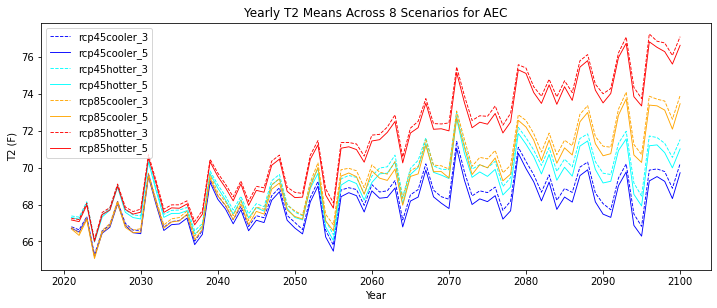

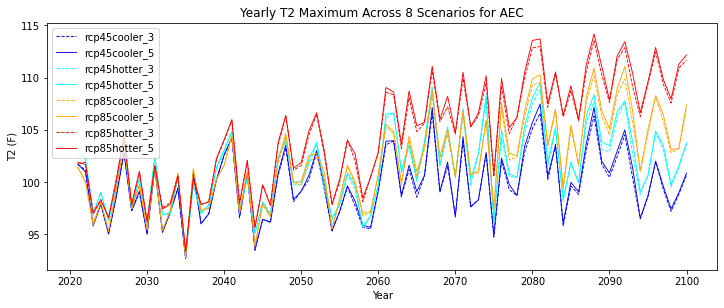

In [10]:
aec_yearly_means = yearly_means('AEC')
aec_yearly_maxes = max_yearly_t2('AEC')

# set plot structure
plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.rcParams['font.size'] = 10

# generate top plot of
plt.plot(aec_yearly_means['Index'], aec_yearly_means['45Cooler_3'], label = 'rcp45cooler_3', color = 'blue', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['45Cooler_5'], label = 'rcp45cooler_5', color = 'blue', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['45Hotter_3'], label = 'rcp45hotter_3', color = 'cyan', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['45Hotter_5'], label = 'rcp45hotter_5', color = 'cyan', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['85Cooler_3'], label = 'rcp85cooler_3', color = 'orange', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['85Cooler_5'], label = 'rcp85cooler_5', color = 'orange', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['85Hotter_3'], label = 'rcp85hotter_3', color = 'red', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_means['Index'], aec_yearly_means['85Hotter_5'], label = 'rcp85hotter_5', color = 'red', linewidth = 0.9)

plt.xlabel('Year')
plt.ylabel('T2 (F)')
plt.title('Yearly T2 Means Across 8 Scenarios for AEC')
plt.legend()

plt.figure(figsize=(12, 10))
plt.subplot(212)

plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['45Cooler_3'], label = 'rcp45cooler_3', color = 'blue', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['45Cooler_5'], label = 'rcp45cooler_5', color = 'blue', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['45Hotter_3'], label = 'rcp45hotter_3', color = 'cyan', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['45Hotter_5'], label = 'rcp45hotter_5', color = 'cyan', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['85Cooler_3'], label = 'rcp85cooler_3', color = 'orange', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['85Cooler_5'], label = 'rcp85cooler_5', color = 'orange', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['85Hotter_3'], label = 'rcp85hotter_3', color = 'red', linestyle = 'dashed', linewidth = 0.9)
plt.plot(aec_yearly_maxes['Index'], aec_yearly_maxes['85Hotter_5'], label = 'rcp85hotter_5', color = 'red', linewidth = 0.9)
plt.xlabel('Year')
plt.ylabel('T2 (F)')
plt.title('Yearly T2 Maximum Across 8 Scenarios for AEC')
plt.legend()

plt.show()

In [46]:
# now to create a function for this instead
def max_mean_plot(input_BA):  # input_BA as a string e.g. 'AEC'
    
    # call both functions to get max value df and mean value df
    mean_df = yearly_means(input_BA)
    max_df = max_yearly_t2(input_BA)
    
    # set plot structure
    plt.figure(figsize=(12, 10))
    plt.rcParams['font.size'] = 10
    plt.subplot(211)
    # plt.rcParams['font.size'] = 10

    # generate top plot of subplot, get 8 lines for each mean value scenario
    plt.plot(mean_df['Index'], mean_df['45Cooler_3'], label = 'rcp45cooler_3', color = 'blue', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['45Cooler_5'], label = 'rcp45cooler_5', color = 'blue', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['45Hotter_3'], label = 'rcp45hotter_3', color = 'skyblue', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['45Hotter_5'], label = 'rcp45hotter_5', color = 'skyblue', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['85Cooler_3'], label = 'rcp85cooler_3', color = 'darkorange', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['85Cooler_5'], label = 'rcp85cooler_5', color = 'darkorange', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['85Hotter_3'], label = 'rcp85hotter_3', color = 'red', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(mean_df['Index'], mean_df['85Hotter_5'], label = 'rcp85hotter_5', color = 'red', linewidth = 0.9)

    # add axes, title, and legend
    plt.xlabel('Year')
    plt.ylabel('T2 (F)')
    plt.title('Yearly T2 Means Across 8 Scenarios for ' + input_BA)
    plt.legend()

    # begin second plot
    plt.subplot(212)

    # generate the 8 lines of max value data
    plt.plot(max_df['Index'], max_df['45Cooler_3'], label = 'rcp45cooler_3', color = 'blue', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['45Cooler_5'], label = 'rcp45cooler_5', color = 'blue', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['45Hotter_3'], label = 'rcp45hotter_3', color = 'skyblue', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['45Hotter_5'], label = 'rcp45hotter_5', color = 'skyblue', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['85Cooler_3'], label = 'rcp85cooler_3', color = 'darkorange', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['85Cooler_5'], label = 'rcp85cooler_5', color = 'darkorange', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['85Hotter_3'], label = 'rcp85hotter_3', color = 'red', linestyle = 'dashed', linewidth = 0.9)
    plt.plot(max_df['Index'], max_df['85Hotter_5'], label = 'rcp85hotter_5', color = 'red', linewidth = 0.9)
    
    # add axes, legend, and title
    plt.xlabel('Year')
    plt.ylabel('T2 (F)')
    plt.title('Yearly T2 Maximums Across 8 Scenarios for ' + input_BA)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('maxes_means_' + input_BA + '.png', bbox_inches = "tight")
    plt.show()
    
    return

In [42]:
# set path to get BA names to loop over
list_of_files = glob.glob(os.path.join(r'C:\projects\rcp45cooler_ssp3', "*.csv"))
    
# get a list of unique BA names
BA_names = []
for file_index in range(len(list_of_files)):
    base_name = os.path.splitext(os.path.basename(list_of_files[file_index]))[0]
    split = base_name.split("_")
    if split[0] in BA_names:
        pass
    else:
        BA_names.append(split[0])

In [50]:
# for name in BA_names:
    # max_mean_plot(name)